# Task :

Build a model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter.  
Points to Remember:

•	There are no null values in the dataset. 

•	There may be some customers with no loan history. 

•	The dataset is imbalanced. Label ‘1’ has approximately 87.5% records, while, label ‘0’ has approximately 12.5% records.

•	For some features, there may be values which might not be realistic. You may have to observe them and treat them with a suitable explanation.

•	You might come across outliers in some features which you need to handle as per your understanding. Keep in mind that data is expensive and we cannot lose more than 7-8% of the data.  


## Import Libraries 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## Importing Data

Importing the data for the Modeling Exercise using pandas library

In [2]:
df=pd.read_csv('micro-credit defaulter Data file.csv')
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


Inorder to view the all columns and rows in maximize manner, we will use display max option

In [ ]:
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows',None) 

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df.info()

There are only 3 columns out of 37 are of object data type. 

Our attempt will be to convert the whole data into integer or float type. 

In [ ]:
df.isnull().sum()

There are no evidences of nulls in provided data. So we can proceed for further processing.

In [10]:
df.nunique()

label                        2
aon                       4507
daily_decr30            147026
rental30                132148
last_rech_date_ma         1186
last_rech_date_da         1174
last_rech_amt_ma            70
cnt_ma_rech30               71
fr_ma_rech30              1083
sumamnt_ma_rech30        15141
medianamnt_ma_rech30       510
medianmarechprebal30     30428
cnt_ma_rech90              110
fr_ma_rech90                89
sumamnt_ma_rech90        31771
medianamnt_ma_rech90       608
medianmarechprebal90     29785
cnt_da_rech30             1066
fr_da_rech30              1072
cnt_da_rech90               27
fr_da_rech90                46
cnt_loans30                 40
amnt_loans30                48
maxamnt_loans30           1050
medianamnt_loans30           6
cnt_loans90               1110
maxamnt_loans90              3
payback30                 1363
payback90                 2381
Month                        3
Date                        31
dtype: int64

From data description,

msisdn : mobile number of user - Which will not have direct contribution in defaulter prediction as mobile number cannot be measuring paramater

pcircle : telecom circle - Which is observed common for all, so cannot be predective paramater being unique value for all.

Unnamed: 0 : Undefined and non-important data.


In [3]:
df.drop(columns=['msisdn','pcircle', 'Unnamed: 0'], axis=1, inplace=True)
df.shape

(209593, 34)

We have dropped the columns which were not contributing in prediction model. 

In [ ]:
df.info()

Now our data has 21 columns with float type data, 12 columns with integer type data, and only one columns with object type data is 'pdate' 

We will extract only day and month data by converting it into datetime format. 2016 is common year, which will be not contributing in any prediction, so we will drop it along with 'pdate' after extracting rquired data from it.


In [4]:
df['pdate'] = pd.to_datetime(df['pdate'])
df['Month']=df['pdate'].dt.month
df['Date']=df['pdate'].dt.day

df.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate,Month,Date
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,0.0,2.0,12,6,0.0,29.000000,29.000000,2016-07-20,7,20
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,0.0,1.0,12,12,0.0,0.000000,0.000000,2016-08-10,8,10
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,0.0,1.0,6,6,0.0,0.000000,0.000000,2016-08-19,8,19
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,0.0,2.0,12,6,0.0,0.000000,0.000000,2016-06-06,6,6
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,0.0,7.0,42,6,0.0,2.333333,2.333333,2016-06-22,6,22


In [5]:
df.drop('pdate', axis= 1, inplace = True)



In [ ]:
df.info()

Now there are 21 columns with float64, 14 columns with int64. 

In [ ]:
df.describe()

### Findings :

1. 'label' is a column in which Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan hase Mean  greater than median i.e 0.87  for the date in the range of (0 , 1).  Which shows the sign of the right skewed data. 

2. The difference between 75% and maximum of each columns is much more. There is sign of presence of outliers, which need to be treated well.



In [6]:
df.corr()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Month,Date
label,1.000000,-0.003785,0.168298,0.166150,0.058085,0.075521,0.003728,0.001711,0.131804,0.237331,...,0.000248,0.044589,0.004733,0.199788,0.084144,0.035747,0.048336,0.049183,0.154949,0.006825
aon,-0.003785,1.000000,0.001104,0.000374,-0.000960,-0.000790,0.001692,-0.001693,0.004256,-0.003148,...,-0.002764,0.004664,-0.000611,-0.002319,-0.001191,0.002771,0.001940,0.002203,-0.001863,0.000662
daily_decr30,0.168298,0.001104,1.000000,0.977704,0.442066,0.458977,0.000487,-0.001636,0.275837,0.451385,...,-0.000028,-0.011610,0.008962,0.563496,0.400199,-0.037305,0.026915,0.047175,0.518664,0.006477
daily_decr90,0.166150,0.000374,0.977704,1.000000,0.434685,0.471730,0.000908,-0.001886,0.264131,0.426707,...,0.000025,-0.005591,0.009446,0.567204,0.397251,-0.034686,0.019400,0.040800,0.539410,-0.021508
rental30,0.058085,-0.000960,0.442066,0.434685,1.000000,0.955237,-0.001095,0.003261,0.127271,0.233343,...,-0.000864,-0.016482,0.004012,0.298943,0.234211,-0.035489,0.072974,0.095147,0.365699,0.036537
rental90,0.075521,-0.000790,0.458977,0.471730,0.955237,1.000000,-0.001688,0.002794,0.121416,0.230260,...,-0.001411,-0.009467,0.005141,0.327436,0.251029,-0.034122,0.067110,0.099501,0.429407,0.008941
last_rech_date_ma,0.003728,0.001692,0.000487,0.000908,-0.001095,-0.001688,1.000000,0.001790,-0.000147,0.004311,...,0.000928,0.001835,-0.000225,0.000870,-0.001123,0.002771,-0.002233,-0.001583,-0.001207,0.000560
last_rech_date_da,0.001711,-0.001693,-0.001636,-0.001886,0.003261,0.002794,0.001790,1.000000,-0.000149,0.001549,...,0.000503,0.000061,-0.000972,0.000519,0.001524,-0.002239,0.000077,0.000417,-0.001800,0.000631
last_rech_amt_ma,0.131804,0.004256,0.275837,0.264131,0.127271,0.121416,-0.000147,-0.000149,1.000000,-0.002662,...,0.001000,0.028370,0.000093,0.014067,0.148460,0.021004,-0.027369,-0.014260,0.096919,0.028883
cnt_ma_rech30,0.237331,-0.003148,0.451385,0.426707,0.233343,0.230260,0.004311,0.001549,-0.002662,1.000000,...,0.000109,-0.067011,0.014703,0.685257,0.174104,-0.071451,0.043617,0.017362,0.156148,0.068643


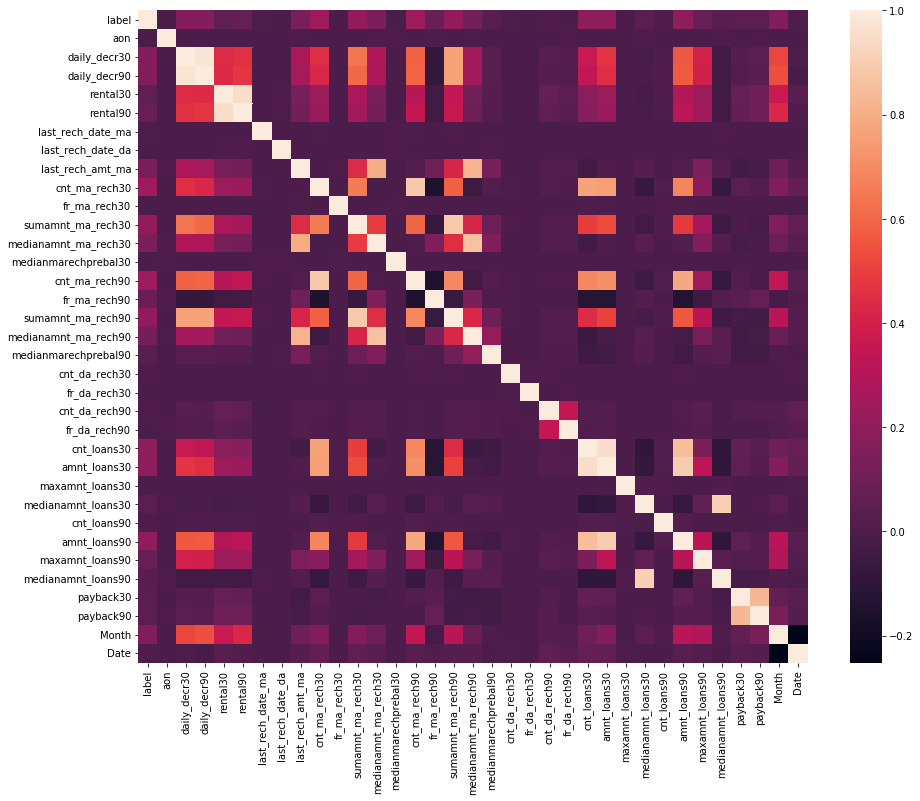

In [7]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr())

column daily_decr30 and daily_decr90 are highly correlated : 0.977704 

column rental30 and rental90  are highly correlated : 0.955237 

column amount_loans30 & amount_loans90 are highly correlated  : 0.897961

column medianamnt_loans30 and medianamnt_loans90 are highly correlated :0.911604	


we will drop any of the pairing column.

In [8]:
df.drop(columns=['daily_decr90','rental90','amnt_loans90','medianamnt_loans90'], axis=1 , inplace = True)

## EDA

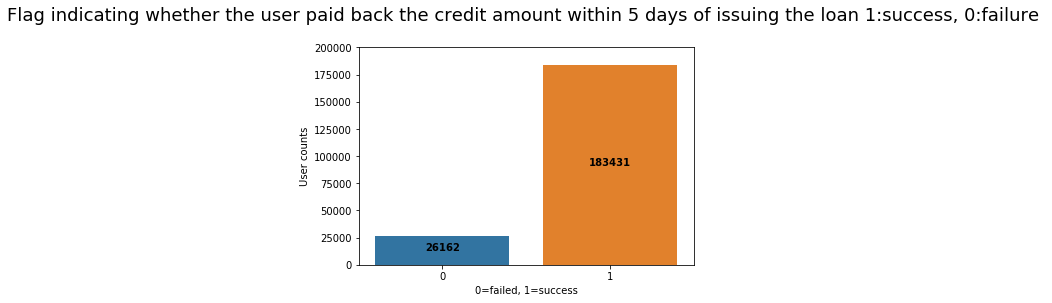

In [13]:
sns.countplot(x='label',data=df)

plt.ylim(0,200000)
a = df['label'].value_counts()[0]
b = df['label'].value_counts()[1]
plt.xlabel('0=failed, 1=success')
plt.text(0,a/2, a, ha='center', fontweight='bold')
plt.text(1,b/2, b, ha='center', fontweight='bold')
plt.ylabel('User counts')
plt.title('Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan 1:success, 0:failure \n',fontsize=18)
plt.show()


Data is highly imbalanced as defaulter and non defaulter data is not near to equal.

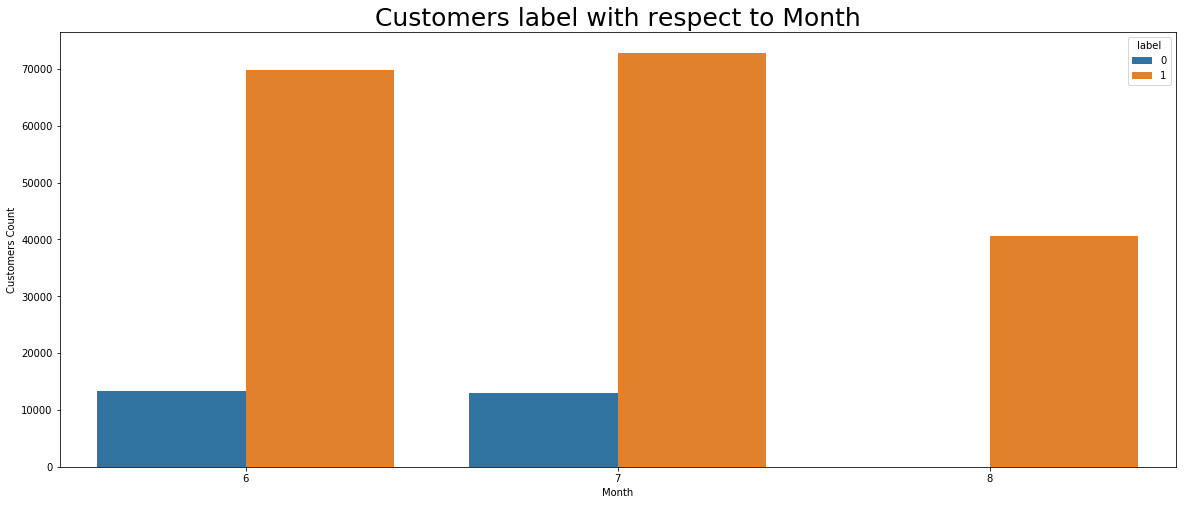

7    85765
6    83154
8    40674
Name: Month, dtype: int64


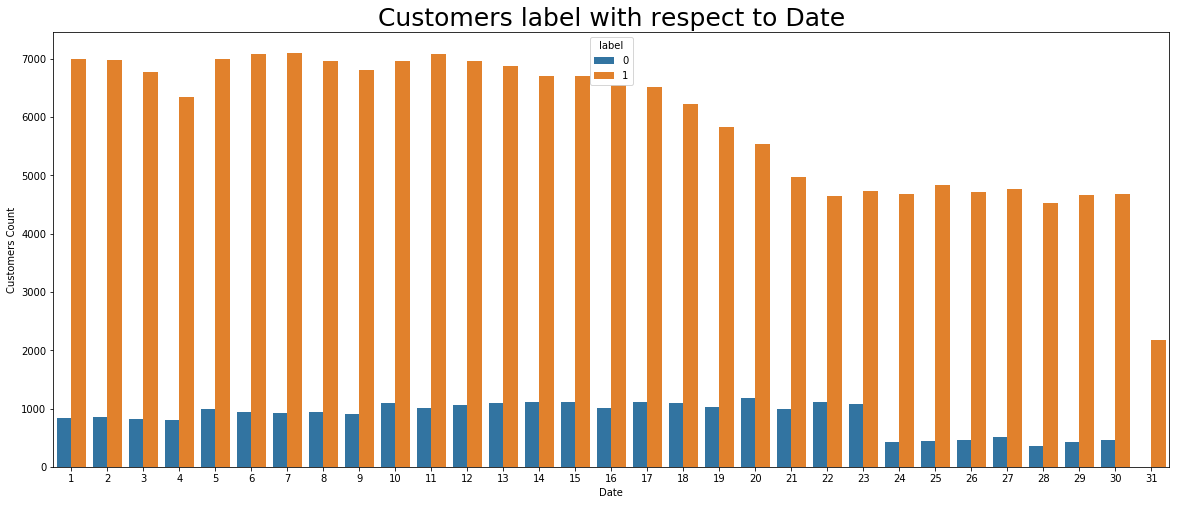

11    8092
10    8050
6     8030
12    8028
7     8026
5     7989
13    7969
8     7899
2     7839
1     7824
15    7820
14    7816
9     7717
17    7643
3     7607
16    7556
18    7305
4     7154
19    6857
20    6729
21    5964
23    5816
22    5753
27    5283
25    5269
26    5174
30    5129
24    5103
29    5077
28    4897
31    2178
Name: Date, dtype: int64


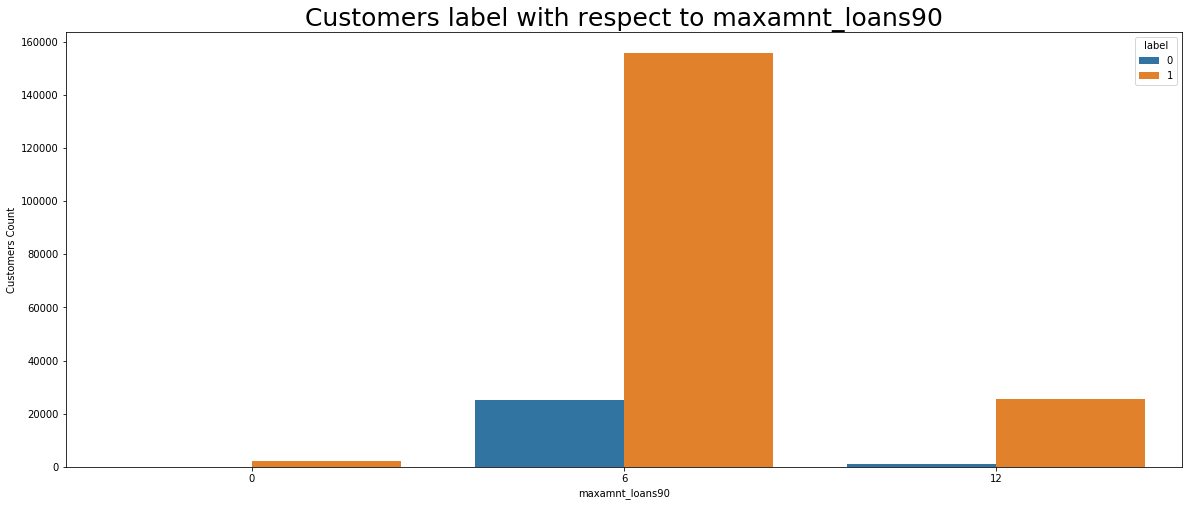

6     180945
12     26605
0       2043
Name: maxamnt_loans90, dtype: int64


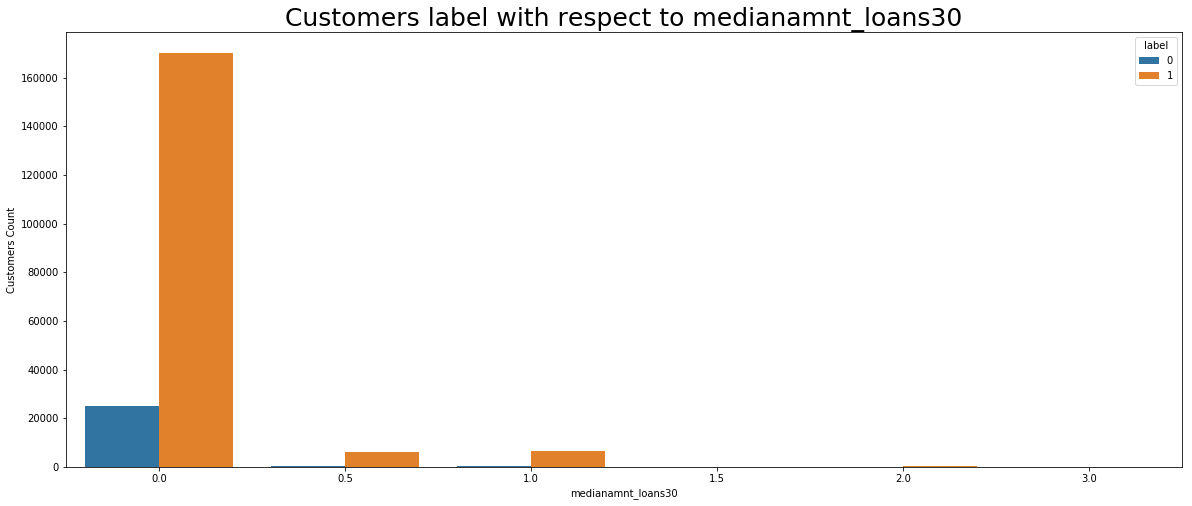

0.0    195445
1.0      7149
0.5      6538
2.0       420
1.5        38
3.0         3
Name: medianamnt_loans30, dtype: int64


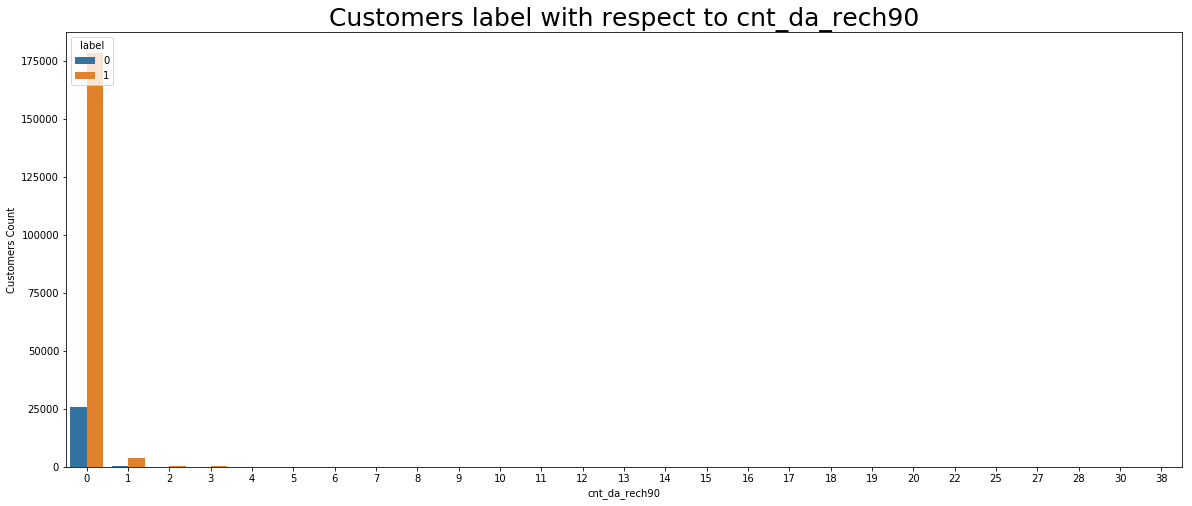

0     204226
1       4173
2        556
3        227
4        150
5         74
6         49
7         36
8         30
9         18
14        10
12         7
11         7
10         6
13         6
16         4
18         3
15         2
30         1
17         1
19         1
20         1
22         1
25         1
27         1
28         1
38         1
Name: cnt_da_rech90, dtype: int64


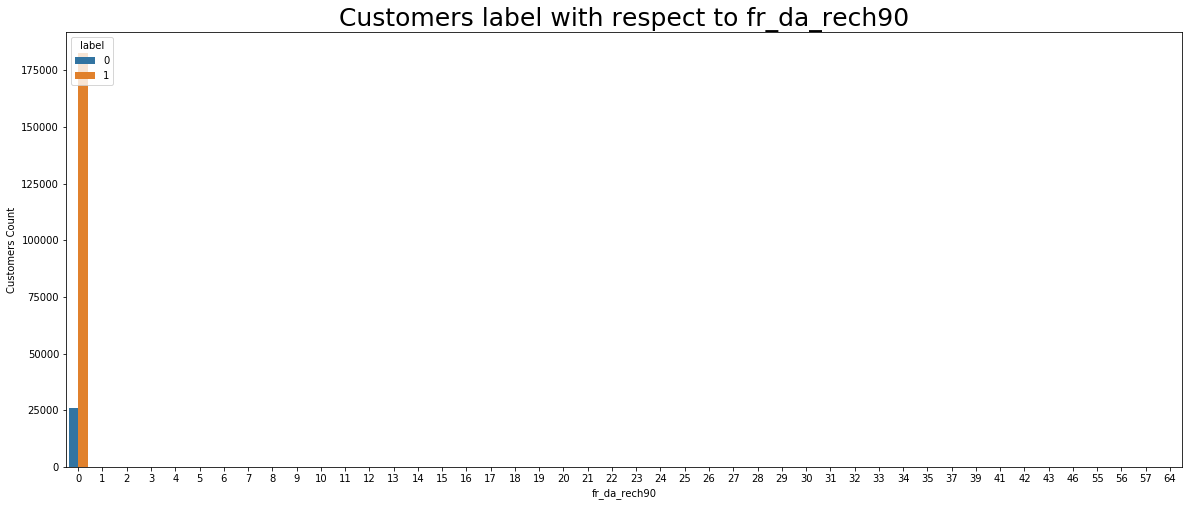

0     208728
3         78
1         66
2         66
4         56
7         55
6         52
5         45
8         44
10        33
9         32
14        32
11        30
12        27
19        22
28        19
13        17
15        17
18        16
29        15
16        14
17        14
22        11
25        11
21        10
20         9
24         8
27         8
32         8
26         7
30         7
31         6
34         5
23         5
37         5
57         3
35         2
41         2
46         1
56         1
55         1
33         1
43         1
42         1
39         1
64         1
Name: fr_da_rech90, dtype: int64


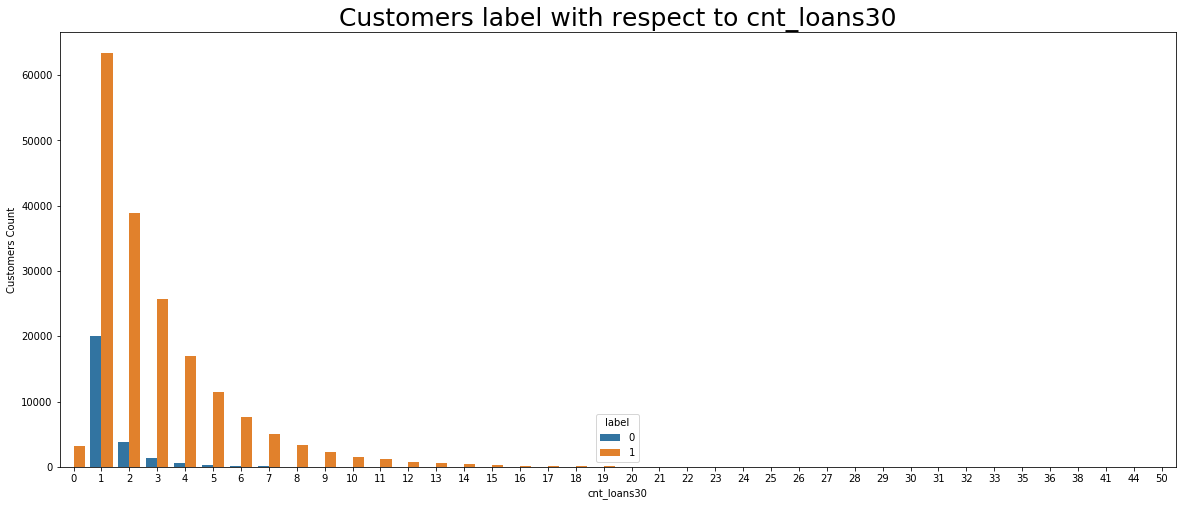

1     83432
2     42665
3     27050
4     17499
5     11673
6      7773
7      5041
8      3384
0      3259
9      2273
10     1571
11     1143
12      793
13      547
14      383
15      270
16      213
17      164
18       98
19       77
20       54
21       45
22       42
23       38
25       19
26       17
27       15
24       13
29        9
31        8
28        7
30        4
32        4
33        3
38        2
41        1
44        1
36        1
35        1
50        1
Name: cnt_loans30, dtype: int64


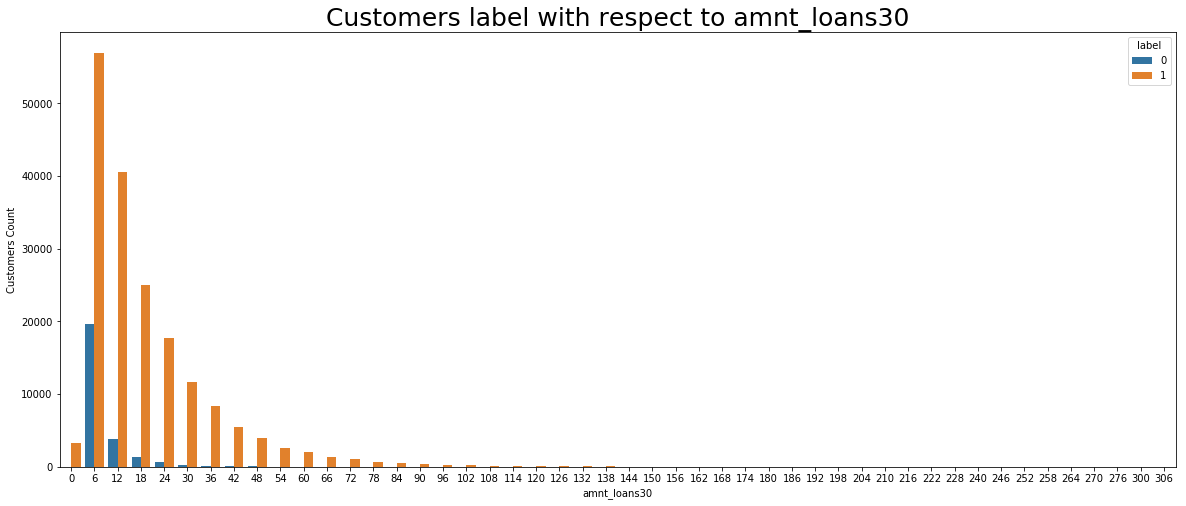

6      76620
12     44384
18     26379
24     18403
30     11999
36      8559
42      5580
48      3994
0       3259
54      2660
60      2043
66      1402
72      1101
78       742
84       580
90       394
96       333
102      252
108      182
114      135
120      119
132       92
126       80
138       64
156       34
144       30
150       30
162       29
168       20
174       17
186       15
180       13
192        7
198        6
210        4
252        4
228        4
216        4
276        3
222        3
264        3
258        3
204        2
240        2
300        1
270        1
306        1
246        1
Name: amnt_loans30, dtype: int64


In [23]:
Column_list = ['Month', 'Date','maxamnt_loans90', 'medianamnt_loans30' ,'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30']
for i in Column_list:
    plt.figure(figsize=(20,8))
    sns.countplot(x=i, hue='label', data=df, palette= None)
    plt.title("Customers label with respect to "+ i, fontsize=25)
    plt.xlabel(i)
    plt.ylabel('Customers Count')
    plt.show()
    print(df[i].value_counts())

1. Customers label with respect to months shows that 6th & 7th month have same number of defaulter and success, whereas 8th month is having 0 failure.

2. rate of Fail to repay is considerable from 1st to 23rd of the month, and then sudden drop is observed

3. maximum amount of loan taken by the user in last 90 days has Rs. 6 has maximum number of 180945 against very less number of repayments.



In [24]:
df.skew()

label                   -2.270254
aon                     10.392949
daily_decr30             3.946230
rental30                 4.521929
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
maxamnt_loans90          1.678304
payback30                8.310695
payback90                6.899951
Month         

### Obtaining Z score :-

In [36]:
from scipy.stats import zscore
z_df=np.abs(zscore(df))
z_df

threshold=3
print(np.where(z_df>3))


(array([    21,     22,     22, ..., 209580, 209580, 209587], dtype=int64), array([13, 13, 28, ..., 15, 26, 24], dtype=int64))


In [37]:
df_Zscore=df[(z_df<3).all(axis=1)]

In [38]:
df_Zscore.shape

(163142, 31)

### Splitting the data into x and y

In [39]:
x = df.drop(['label'], axis=1)

y = df['label']

### Scaling in input variables

In [40]:
from sklearn.preprocessing import StandardScaler
stsc=StandardScaler()
x=stsc.fit_transform(x)

### Splitting the data into training and testing data

In [41]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42,stratify=y)

### Importing ML models :-

In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


### LogisticRegression

In [58]:
Lr=LogisticRegression()
Lr.fit(x_train,y_train)
pred = Lr.predict(x_test)
acc_score = (accuracy_score(y_test, pred))*100

acc_score

87.67146162837854

### DecisionTreeClassifier

In [60]:
dst=DecisionTreeClassifier()
dst.fit(x_train,y_train)
pred = dst.predict(x_test)
acc_score = (accuracy_score(y_test, pred))*100

acc_score

88.31794651589972

### RandomForestClassifier

In [61]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
acc_score = (accuracy_score(y_test, pred))*100

acc_score

91.5909253560438

## Precision and recall score for RandomForestClassifier model :-

In [64]:
class_report = classification_report(y_test, pred)

In [65]:
print('Classification report for Randomforest model \n',class_report)

Classification report for Randomforest model 
              precision    recall  f1-score   support

          0       0.56      0.41      0.47      5232
          1       0.92      0.95      0.94     36687

avg / total       0.87      0.89      0.88     41919

